In [ ]:
!pip install -q nnunetv2 torch torchvision torchaudio
!pip install -q nibabel simpleitk monai matplotlib pandas tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 18.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 770.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))


GPU Available: True
GPU Name: Tesla T4


In [ ]:
!wget --progress=bar:force -O ISLES-2022.zip \
https://zenodo.org/records/7153326/files/ISLES-2022.zip?download=1


--2026-01-29 14:56:06--  https://zenodo.org/records/7153326/files/ISLES-2022.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.52.235, 188.185.48.75, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|137.138.52.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1692717470 (1.6G) [application/octet-stream]
Saving to: ‘ISLES-2022.zip’

ISLES-2022.zip      100%[===================>]   1.58G  5.03MB/s    in 21m 32s 

2026-01-29 15:17:40 (1.25 MB/s) - ‘ISLES-2022.zip’ saved [1692717470/1692717470]



In [ ]:
!unzip ISLES-2022.zip -d ISLES2022


Archive:  ISLES-2022.zip
   creating: ISLES2022/ISLES-2022/
   creating: ISLES2022/ISLES-2022/sub-strokecase0140/
   creating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/
   creating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/anat/
  inflating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/anat/sub-strokecase0140_ses-0001_FLAIR.nii.gz  
  inflating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/anat/sub-strokecase0140_ses-0001_FLAIR.json  
   creating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/dwi/
  inflating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/dwi/sub-strokecase0140_ses-0001_dwi.nii.gz  
  inflating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/dwi/sub-strokecase0140_ses-0001_adc.nii.gz  
  inflating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/dwi/sub-strokecase0140_ses-0001_dwi.json  
  inflating: ISLES2022/ISLES-2022/sub-strokecase0140/ses-0001/dwi/sub-strokecase0140_ses-0001_adc.json  
   creating: ISLES2022/ISLES-2022/sub-strokeca

In [ ]:

import os

base_path = "ISLES2022/ISLES-2022"
for root, dirs, files in os.walk(base_path):
    print(root, len(files))
    break



ISLES2022/ISLES-2022 4


In [ ]:
import os

base_path = "ISLES2022/ISLES-2022"

print("Folders:")
for d in os.listdir(base_path):
    if os.path.isdir(os.path.join(base_path, d)):
        print(" ", d)


Folders:
  sub-strokecase0249
  sub-strokecase0106
  sub-strokecase0120
  sub-strokecase0238
  sub-strokecase0117
  sub-strokecase0123
  sub-strokecase0214
  sub-strokecase0059
  sub-strokecase0053
  sub-strokecase0122
  sub-strokecase0095
  sub-strokecase0137
  sub-strokecase0007
  sub-strokecase0089
  sub-strokecase0113
  sub-strokecase0046
  sub-strokecase0098
  sub-strokecase0112
  sub-strokecase0128
  sub-strokecase0208
  sub-strokecase0070
  sub-strokecase0213
  sub-strokecase0039
  sub-strokecase0185
  sub-strokecase0145
  sub-strokecase0161
  sub-strokecase0233
  sub-strokecase0043
  sub-strokecase0188
  sub-strokecase0176
  sub-strokecase0062
  sub-strokecase0087
  sub-strokecase0159
  sub-strokecase0171
  sub-strokecase0037
  sub-strokecase0052
  sub-strokecase0141
  sub-strokecase0138
  sub-strokecase0173
  sub-strokecase0035
  sub-strokecase0210
  sub-strokecase0140
  sub-strokecase0015
  sub-strokecase0197
  sub-strokecase0234
  sub-strokecase0149
  sub-strokecase0200
  su

Image shape: (281, 352, 352)
Mask shape : (112, 112, 73)


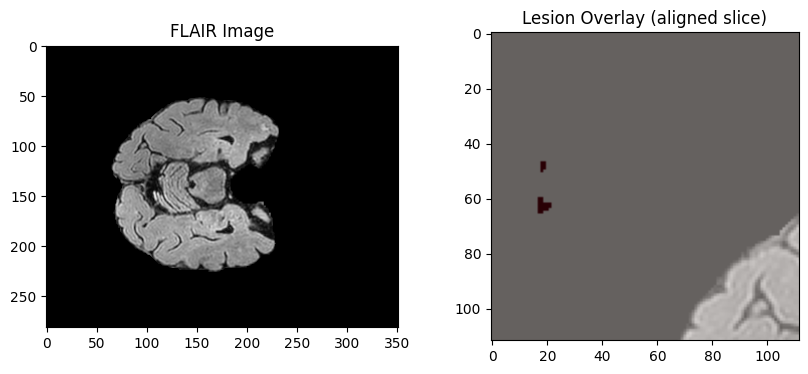

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import glob

subject = "sub-strokecase0001"

img_path = glob.glob(
    f"ISLES2022/ISLES-2022/{subject}/**/*FLAIR*.nii.gz",
    recursive=True
)[0]

mask_path = glob.glob(
    f"ISLES2022/ISLES-2022/derivatives/{subject}/**/*msk*.nii.gz",
    recursive=True
)[0]

img = nib.load(img_path).get_fdata()
mask = nib.load(mask_path).get_fdata()

print("Image shape:", img.shape)
print("Mask shape :", mask.shape)

# choose middle slices safely
img_slice = img.shape[2] // 2
mask_slice = int(img_slice * mask.shape[2] / img.shape[2])

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img[:,:,img_slice], cmap="gray")
plt.title("FLAIR Image")

plt.subplot(1,2,2)
plt.imshow(img[:,:,img_slice], cmap="gray")
plt.imshow(mask[:,:,mask_slice], cmap="Reds", alpha=0.4)
plt.title("Lesion Overlay (aligned slice)")

plt.show()


**nnU-Net Data Preprocessing**

Setup nnU-Net Environment Variables

In [ ]:
import os

os.environ["nnUNet_raw"] = "/content/data/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/content/data/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/data/nnUNet_results"


Convert Dataset to nnU-Net Format

In [ ]:
!mkdir -p $nnUNet_raw/Dataset001_ISLES2022/imagesTr
!mkdir -p $nnUNet_raw/Dataset001_ISLES2022/labelsTr


Create nnU-Net folders

In [ ]:
import os

nnunet_raw = "/content/data/nnUNet_raw/Dataset001_ISLES2022"
imagesTr = os.path.join(nnunet_raw, "imagesTr")
labelsTr = os.path.join(nnunet_raw, "labelsTr")

os.makedirs(imagesTr, exist_ok=True)
os.makedirs(labelsTr, exist_ok=True)


Conversion Script

In [ ]:
import shutil
import glob

bids_root = "ISLES2022/ISLES-2022"
subjects = sorted([s for s in os.listdir(bids_root) if s.startswith("sub-")])

case_id = 0
copied = 0

for sub in subjects:
    try:
        # find FLAIR image
        img_candidates = glob.glob(
            f"{bids_root}/{sub}/**/*FLAIR*.nii.gz",
            recursive=True
        )

        # find lesion mask
        mask_candidates = glob.glob(
            f"{bids_root}/derivatives/{sub}/**/*msk*.nii.gz",
            recursive=True
        )

        if len(img_candidates) == 0 or len(mask_candidates) == 0:
            print(f"Skipping {sub} (missing image or mask)")
            continue

        img_src = img_candidates[0]
        mask_src = mask_candidates[0]

        case_name = f"case_{case_id:04d}"

        img_dst = os.path.join(imagesTr, f"{case_name}_0000.nii.gz")
        mask_dst = os.path.join(labelsTr, f"{case_name}.nii.gz")

        shutil.copy(img_src, img_dst)
        shutil.copy(mask_src, mask_dst)

        copied += 1
        case_id += 1

    except Exception as e:
        print(f"Error processing {sub}: {e}")

print(f"\n✅ Conversion complete. Total cases copied: {copied}")



✅ Conversion complete. Total cases copied: 250


Verify Conversion

In [ ]:
print("ImagesTr:", len(os.listdir(imagesTr)))
print("LabelsTr:", len(os.listdir(labelsTr)))


ImagesTr: 250
LabelsTr: 250


Create dataset.json

In [ ]:
import json
import os

dataset_json = {
    "channel_names": {
        "0": "FLAIR"
    },
    "labels": {
        "background": 0,
        "lesion": 1
    },
    "numTraining": len(
        os.listdir("/content/data/nnUNet_raw/Dataset001_ISLES2022/imagesTr")
    ),
    "file_ending": ".nii.gz"
}

with open("/content/data/nnUNet_raw/Dataset001_ISLES2022/dataset.json", "w") as f:
    json.dump(dataset_json, f, indent=4)

print("✅ dataset.json fixed for nnU-Net v2")


✅ dataset.json fixed for nnU-Net v2


In [ ]:
!pip uninstall -y nnunet nnunetv2


Found existing installation: nnunetv2 2.6.3
Uninstalling nnunetv2-2.6.3:
  Successfully uninstalled nnunetv2-2.6.3


In [ ]:
!pip install -U nnunetv2


  Using cached nnunetv2-2.6.3-py3-none-any.whl
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import nnunetv2
print("nnU-Net v2 installed correctly")


nnU-Net v2 installed correctly


In [ ]:
!nnUNetv2_train -h


usage: nnUNetv2_train [-h] [-tr TR] [-p P]
                      [-pretrained_weights PRETRAINED_WEIGHTS]
                      [-num_gpus NUM_GPUS] [--npz] [--c] [--val] [--val_best]
                      [--disable_checkpointing] [-device DEVICE]
                      dataset_name_or_id configuration fold

positional arguments:
  dataset_name_or_id    Dataset name or ID to train with
  configuration         Configuration that should be trained
  fold                  Fold of the 5-fold cross-validation. Should be an int
                        between 0 and 4.

options:
  -h, --help            show this help message and exit
  -tr TR                [OPTIONAL] Use this flag to specify a custom trainer.
                        Default: nnUNetTrainer
  -p P                  [OPTIONAL] Use this flag to specify a custom plans
                        identifier. Default: nnUNetPlans
  -pretrained_weights PRETRAINED_WEIGHTS
                        [OPTIONAL] path to nnU-Net checkpoint file 

In [ ]:
import SimpleITK as sitk
import os

imagesTr = "/content/data/nnUNet_raw/Dataset001_ISLES2022/imagesTr"
labelsTr = "/content/data/nnUNet_raw/Dataset001_ISLES2022/labelsTr"

fixed = 0

for fname in os.listdir(imagesTr):
    if not fname.endswith("_0000.nii.gz"):
        continue

    case_id = fname.replace("_0000.nii.gz", "")
    img_path = os.path.join(imagesTr, fname)
    seg_path = os.path.join(labelsTr, f"{case_id}.nii.gz")

    if not os.path.exists(seg_path):
        continue

    img = sitk.ReadImage(img_path)
    seg = sitk.ReadImage(seg_path)

    # Resample segmentation to image space
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(img)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetTransform(sitk.Transform())
    resampler.SetDefaultPixelValue(0)

    seg_resampled = resampler.Execute(seg)

    sitk.WriteImage(seg_resampled, seg_path)
    fixed += 1

print(f"✅ Resampled {fixed} segmentation masks to image space")


✅ Resampled 250 segmentation masks to image space


In [ ]:
!nnUNetv2_plan_and_preprocess \
    -d 1 \
    --verify_dataset_integrity \
    -npfp 2 \
    -np 2


Fingerprint extraction...
Dataset001_ISLES2022
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 250/250 [07:27<00:00,  1.79s/it]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Dropping 3d_lowres config because the image size difference to 3d_fullres is too small. 3d_fullres: [187. 232. 193.], 3d_lowres: [187, 232, 193]
2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 57, 'patch_size': (np.i

Custom nnU-Net Trainer (10 epochs)

In [ ]:
%%writefile /usr/local/lib/python3.12/dist-packages/nnunetv2/training/nnUNetTrainer/nnUNetTrainer_10Epochs.py
from nnunetv2.training.nnUNetTrainer.nnUNetTrainer import nnUNetTrainer

class nnUNetTrainer_10Epochs(nnUNetTrainer):
    max_num_epochs = 2


Overwriting /usr/local/lib/python3.12/dist-packages/nnunetv2/training/nnUNetTrainer/nnUNetTrainer_10Epochs.py


In [ ]:
!ls /usr/local/lib/python3.12/dist-packages/nnunetv2/training/nnUNetTrainer


__init__.py		   nnUNetTrainer.py  __pycache__
nnUNetTrainer_10Epochs.py  primus	     variants


Train Model

In [ ]:
!rm -rf /content/data/nnUNet_results/Dataset001_ISLES2022


In [ ]:
!ls /content/data/nnUNet_results


In [ ]:
!rm -rf /content/data/nnUNet_results/Dataset001_ISLES2022
!rm -rf /root/.cache/torch


In [ ]:
!nnUNetv2_train 1 2d 0



############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2026-01-29 18:13:33.458604: Using torch.compile...
2026-01-29 18:13:35.847492: do_dummy_2d_data_aug: False
2026-01-29 18:13:35.849293: Using splits from existing split file: /content/data/nnUNet_preprocessed/Dataset001_ISLES2022/splits_final.json
2026-01-29 18:13:35.849714: The split file contai

In [ ]:
!ls /content/data/nnUNet_results/Dataset001_ISLES2022


nnUNetTrainer__nnUNetPlans__2d


In [ ]:
!ls /content/data/nnUNet_results/Dataset001_ISLES2022/nnUNetTrainer__nnUNetPlans__2d/fold_0


checkpoint_best.pth  progress.png
debug.json	     training_log_2026_1_29_18_13_32.txt


In [ ]:
!mkdir -p /content/predictions_2d


In [ ]:
!nnUNetv2_predict \
  -i /content/data/nnUNet_raw/Dataset001_ISLES2022/imagesTr \
  -o /content/predictions_2d \
  -d 1 \
  -c 2d \
  -f 0 \
  -chk checkpoint_best.pth



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 250 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 250 cases that I would like to predict

Predicting case_0000:
perform_everything_on_device: True
100% 183/183 [00:13<00:00, 13.30it/s]
sending off prediction to background worker for resampling and export
done with case_0000

Predicting case_0001:
perform_everything_on_device: True
100% 177/177 [00:06<00:00, 27.95it/s]
sending off prediction to background worker for resampling and export
done with case_0001

Predicting case_0002:
perform_everything_on_device: True
1

In [ ]:
!ls /content/predictions_2d | head


case_0000.nii.gz
case_0001.nii.gz
case_0002.nii.gz
case_0003.nii.gz
case_0004.nii.gz
case_0005.nii.gz
case_0006.nii.gz
case_0007.nii.gz
case_0008.nii.gz
case_0009.nii.gz


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import glob

img_path = "/content/data/nnUNet_raw/Dataset001_ISLES2022/imagesTr/case_0000_0000.nii.gz"
pred_path = "/content/predictions_2d/case_0000.nii.gz"
gt_path = "/content/data/nnUNet_raw/Dataset001_ISLES2022/labelsTr/case_0000.nii.gz"

img = nib.load(img_path).get_fdata()
pred = nib.load(pred_path).get_fdata()
gt = nib.load(gt_path).get_fdata()

z = img.shape[2] // 2

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img[:,:,z], cmap="gray")
plt.title("Input FLAIR")

plt.subplot(1,3,2)
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(gt[:,:,z], cmap="Reds", alpha=0.4)
plt.title("Ground Truth")

plt.subplot(1,3,3)
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(pred[:,:,z], cmap="Blues", alpha=0.4)
plt.title("Prediction")

plt.show()


In [ ]:
!ls /content/predictions_2d | head -n 5


case_0000.nii.gz
case_0001.nii.gz
case_0002.nii.gz
case_0003.nii.gz
case_0004.nii.gz


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

case = "case_0012"   # 🔴 CHANGE THIS if needed

img_path  = f"/content/data/nnUNet_raw/Dataset001_ISLES2022/imagesTr/{case}_0000.nii.gz"
pred_path = f"/content/predictions_2d/{case}.nii.gz"
gt_path   = f"/content/data/nnUNet_raw/Dataset001_ISLES2022/labelsTr/{case}.nii.gz"

print("Checking files:")
print("Image exists:", os.path.exists(img_path))
print("GT exists   :", os.path.exists(gt_path))
print("Pred exists :", os.path.exists(pred_path))

img  = nib.load(img_path).get_fdata()
pred = nib.load(pred_path).get_fdata()
gt   = nib.load(gt_path).get_fdata()

print("Shapes:")
print("Image:", img.shape)
print("GT   :", gt.shape)
print("Pred :", pred.shape)

# pick a slice with lesion or prediction
z = int(np.argmax(np.sum(gt, axis=(0,1))))
if z == 0:
    z = img.shape[2] // 2

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img[:,:,z], cmap="gray")
plt.title("Input FLAIR")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(gt[:,:,z], cmap="Reds", alpha=0.4)
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(pred[:,:,z], cmap="Blues", alpha=0.4)
plt.title("Prediction")
plt.axis("off")

plt.show()


Checking files:
Image exists: True
GT exists   : True
Pred exists : True
Shapes:
Image: (281, 352, 352)
GT   : (281, 352, 352)
Pred : (281, 352, 352)


In [ ]:
%matplotlib inline


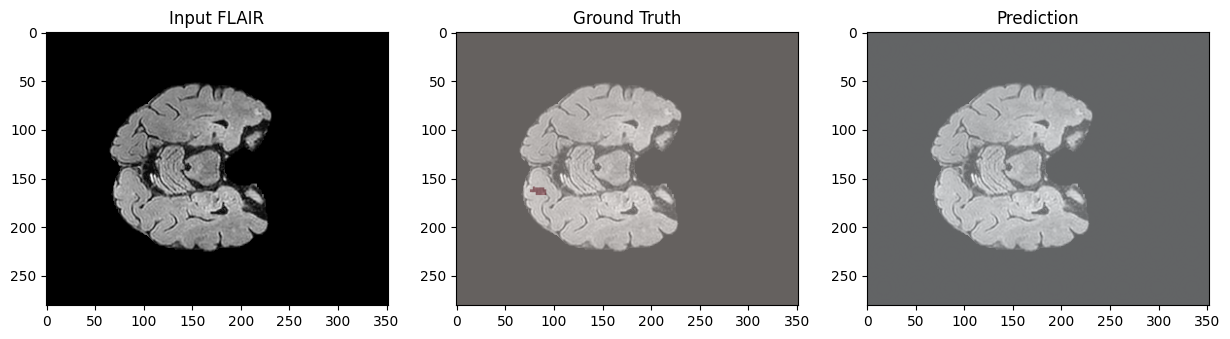

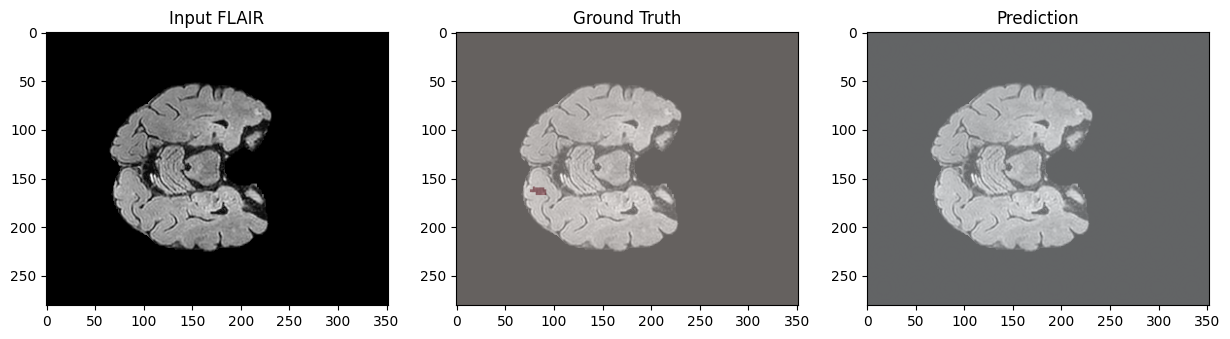

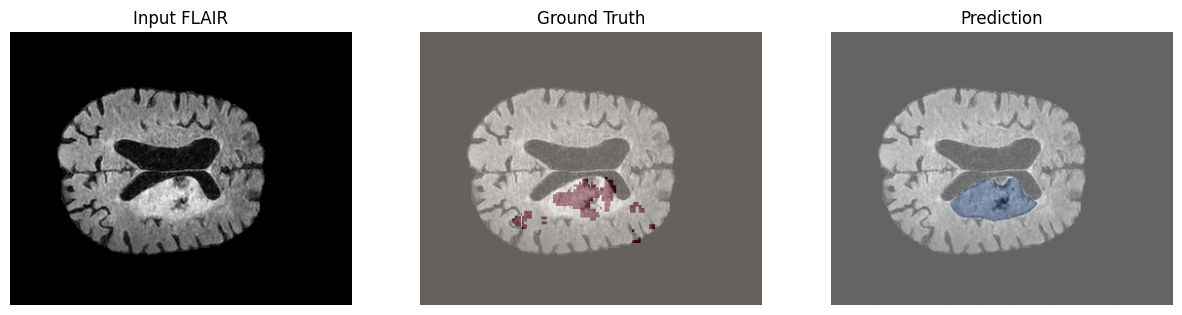

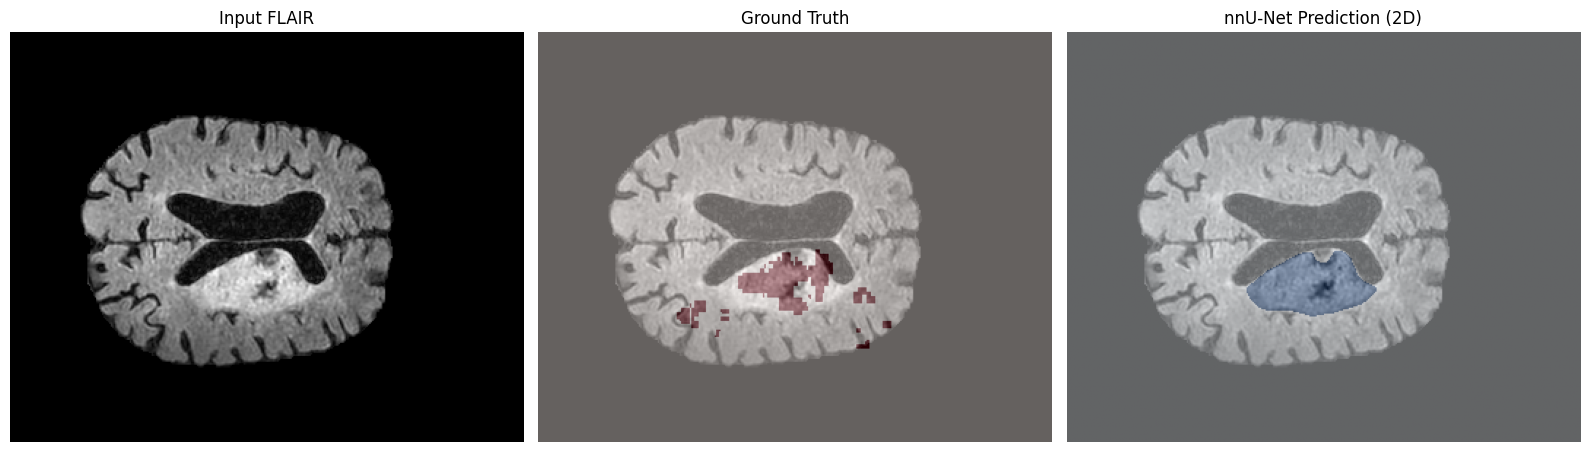

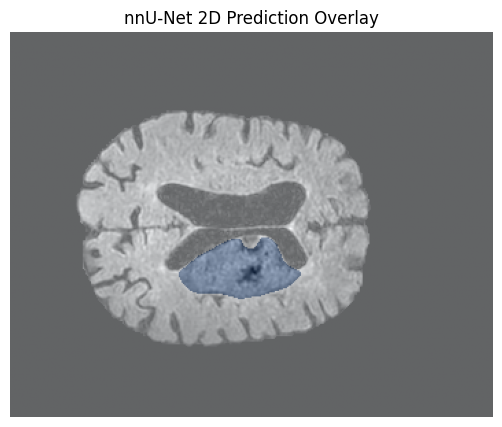

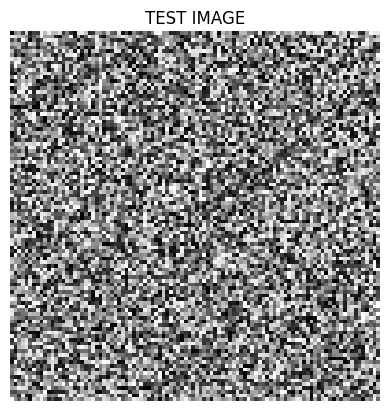

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.imshow(np.random.rand(100,100), cmap="gray")
plt.title("TEST IMAGE")
plt.axis("off")
plt.show()


Starting visualization...
Data loaded
Slice index: 248


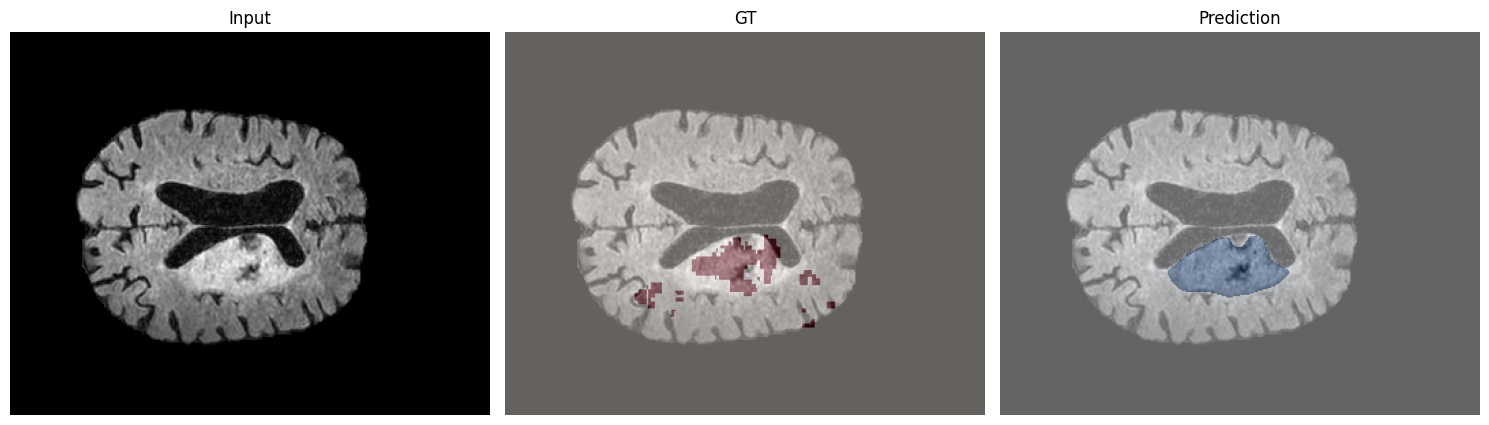

Visualization finished


In [ ]:
print("Starting visualization...")

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

case = "case_0012"

img  = nib.load(f"/content/data/nnUNet_raw/Dataset001_ISLES2022/imagesTr/{case}_0000.nii.gz").get_fdata()
gt   = nib.load(f"/content/data/nnUNet_raw/Dataset001_ISLES2022/labelsTr/{case}.nii.gz").get_fdata()
pred = nib.load(f"/content/predictions_2d/{case}.nii.gz").get_fdata()

print("Data loaded")

z = int(np.argmax(np.sum(gt, axis=(0,1))))
if z == 0:
    z = img.shape[2] // 2

print("Slice index:", z)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img[:,:,z], cmap="gray")
plt.title("Input")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(gt[:,:,z], cmap="Reds", alpha=0.4)
plt.title("GT")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(pred[:,:,z], cmap="Blues", alpha=0.4)
plt.title("Prediction")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Visualization finished")


In [ ]:
!
%%
%%


UsageError: Line magic function `%%` not found.


In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(img[:,:,z], cmap="gray")
plt.imshow(pred[:,:,z], cmap="Blues", alpha=0.4)
plt.axis("off")
plt.savefig("/content/final_prediction.png", dpi=300, bbox_inches="tight")
plt.close()

print("Saved to /content/final_prediction.png")


Saved to /content/final_prediction.png


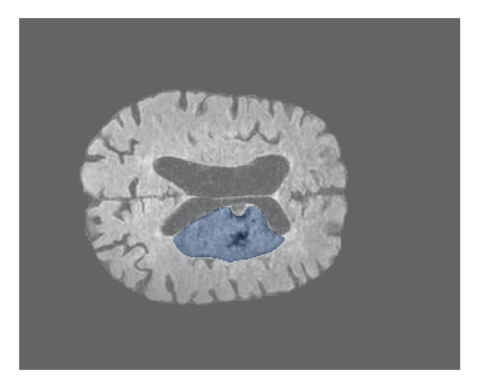

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/final_prediction.png")
plt.imshow(img)
plt.axis("off")
plt.show()
